#데이터 전처리

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, Lion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#패키지 import

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#폰트 설치
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')

In [ ]:
df = df.set_index('관측일시')#인덱스로 설정

In [ ]:
#데이터 분리
target=['가뭄(MSWSI)','가뭄(SPI6)']
X=df.drop(target,axis=1)
y=df[target]


In [ ]:
# y[target] = y[target].replace({ 2: '극한습윤', 1.5: '심한습윤', 1: '보통습윤', 0.5: '약한습윤',0: '정상', -0.5: '약한가뭄', -1: '보통가뭄', -1.5: '심한가뭄', -2: '극한가뭄'})
# y[target] = y[target].astype('category')
# display(y[target])
# y.info()

In [ ]:
#train, test 데이터 나누기
test_size = 52#24년 데이터 개수
X_train, X_test = X[:-test_size], X[-test_size:]#독립변수 분할
y_train, y_test = y[:-test_size], y[-test_size:]#종속변수 분할

In [ ]:
from sklearn.preprocessing import RobustScaler
#스케일러 적용
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)#test는 fit하지 않습니다(데이터누수 때문에)

#dataframe으로 변환
X_train_robust   = pd.DataFrame(X_train_robust, columns=X_train.columns, index=X_train.index)
X_test_robust    = pd.DataFrame(X_test_robust, columns=X_test.columns, index=X_test.index)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse_output=False)
# y_train_ohe  = ohe.fit_transform(y_train[['가뭄(MSWSI)', '가뭄(SPI6)']])
# y_test_ohe  = ohe.transform(y_test[['가뭄(MSWSI)', '가뭄(SPI6)']])#test는 fit하지 않습니다(데이터누수 때문에)
# encoded_y_train = pd.DataFrame(y_train_ohe, columns=ohe.get_feature_names_out(), index=y_train.index)
# encoded_y_test = pd.DataFrame(y_test_ohe, columns=ohe.get_feature_names_out(), index=y_test.index)
# display(encoded_y_train)
# display(encoded_y_test)

# 변수설명
X_train=독립변수 훈련데이터\
X_test=독립변수 테스트데이터\
y_test=종속변수 테스트데이터(원핫인코딩x)\
y_train=종속변수 훈련데이터(원핫인코딩x)\
encoded_y_train=종속변수 테스트데이터(원핫인코딩o)\
encoded_y_test=종속변수 테스트데이터(원핫인코딩o)\
=================================================\
훈련데이터는 X_train_robust,encoded_y_train 사용\
테스트 데이터는 X_test_robust,encoded_y_test 사용


# 모델 성능 높이기 작업(범위 0.5 내 포함 모델)

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3105 - val_loss: 0.2760 - learning_rate: 0.0010
Epoch 2/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2861 - val_loss: 0.2669 - learning_rate: 0.0010
Epoch 3/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2353 - val_loss: 0.2630 - learning_rate: 0.0010
Epoch 4/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2238 - val_loss: 0.2521 - learning_rate: 0.0010
Epoch 5/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2585 - val_loss: 0.2535 - learning_rate: 0.0010
Epoch 6/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2369 - val_loss: 0.2595 - learning_rate: 0.0010
Epoch 7/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2596 - val_loss: 0.2560 - learning_rate: 0.0010
Epoch 8/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2316 - val_loss: 0.2684 - learning_rate: 0.0010
Epoch 9/150
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2307 - val_loss: 0.2658 - learning_rate: 0.0010
Epoch 10/150
58/58 ━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


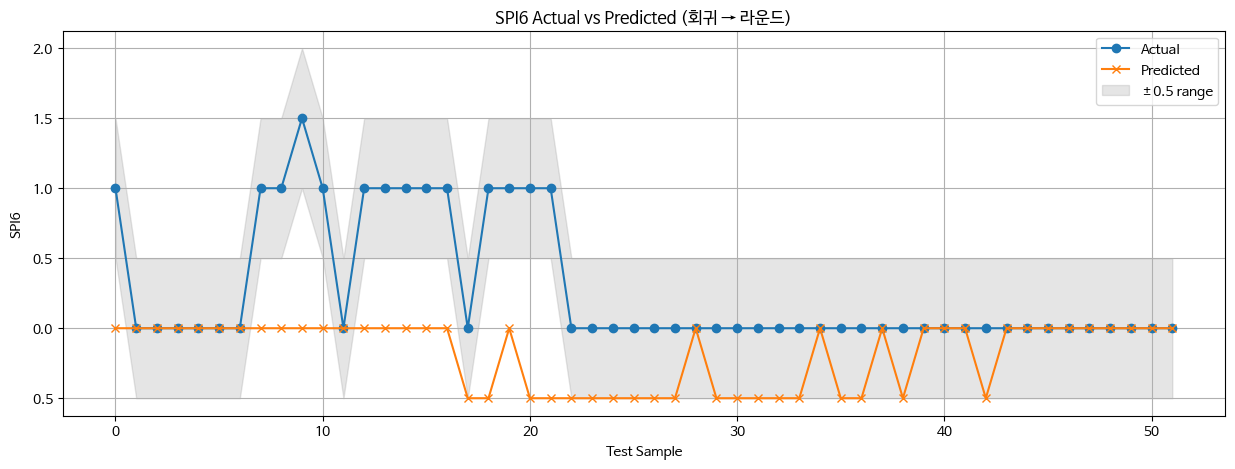

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

X = df.drop(['가뭄(MSWSI)', '가뭄(SPI6)'], axis=1)
y = df['가뭄(SPI6)']

test_size = 52  # 주간 데이터 기준 1년치
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# LSTM 입력 형태 변환
# ------------------------
X_train_seq = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_seq = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
y_train_seq = y_train.values
y_test_seq = y_test.values

# ------------------------
# 모델 정의 함수
# ------------------------
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # 회귀 출력
    model.compile(optimizer='adam', loss='mse')
    return model

# ------------------------
# 학습
# ------------------------
model_spi6 = build_model((X_train_seq.shape[1], X_train_seq.shape[2]))
model_spi6.fit(
    X_train_seq, y_train_seq,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측 (회귀 → 0.5 단위 라운드)
# ------------------------
y_pred = model_spi6.predict(X_test_seq).flatten()
y_pred_rounded = np.round(y_pred * 2) / 2

# ------------------------
# 평가 함수
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")

    prox_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {prox_acc:.3f}")

    for cls in np.unique(y_true):
        idx = y_true == cls
        cls_acc = np.mean(np.abs(y_pred[idx] - cls) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {cls_acc:.2f}")

    plt.figure(figsize=(15,5))
    plt.plot(y_true, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.fill_between(range(len(y_true)), y_true-0.5, y_true+0.5, color='gray', alpha=0.2, label='±0.5 range')
    plt.xlabel('Test Sample')
    plt.ylabel('SPI6')
    plt.title('SPI6 Actual vs Predicted (회귀 → 라운드)')
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------
# 평가 실행
# ------------------------
evaluate_model(y_test_seq, y_pred_rounded)


성능 올리기

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2578 - val_loss: 0.6481 - learning_rate: 0.0010
Epoch 2/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2845 - val_loss: 0.6313 - learning_rate: 0.0010
Epoch 3/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2930 - val_loss: 0.6258 - learning_rate: 0.0010
Epoch 4/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2517 - val_loss: 0.6526 - learning_rate: 0.0010
Epoch 5/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2353 - val_loss: 0.6725 - learning_rate: 0.0010
Epoch 6/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2428 - val_loss: 0.7260 - learning_rate: 0.0010
Epoch 7/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2763 - val_loss: 0.6817 - learning_rate: 0.0010
Epoch 8/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2554 - val_loss: 0.6508 - learning_rate: 0.0010
Epoch 9/150
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2746 - val_loss: 0.6982 - learning_rate: 0.0010
Epoch 10/150
63/63 ━━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


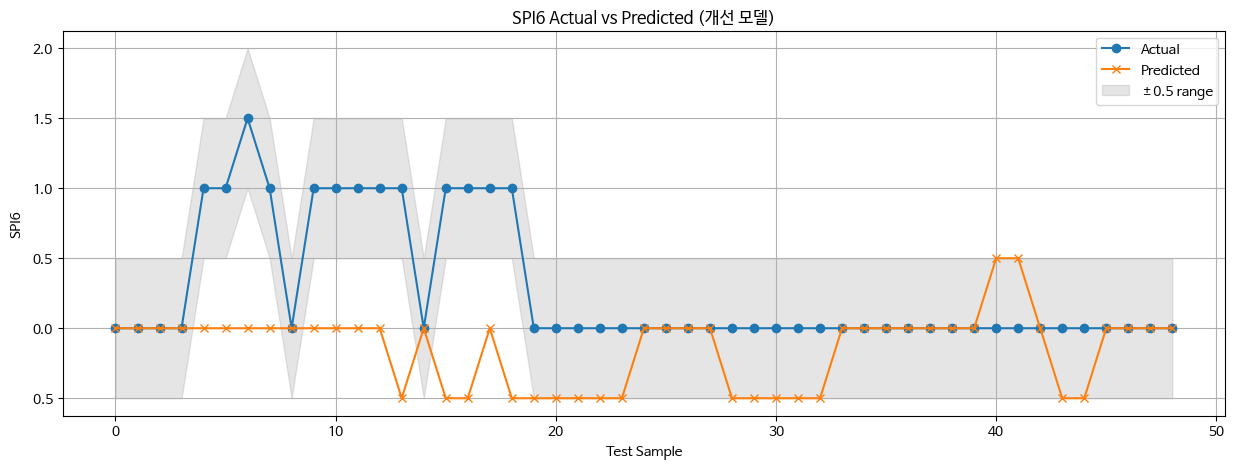

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

X = df.drop(['가뭄(MSWSI)', '가뭄(SPI6)'], axis=1)
y = df['가뭄(SPI6)']

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 시퀀스 생성 (과거 3주 포함)
# ------------------------
def create_sequences(X, y, seq_len=3):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

seq_len = 3
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, seq_len)

# ------------------------
# 데이터 증강 (극단값에 노이즈 추가)
# ------------------------
def augment_extreme(X_seq, y_seq, extreme_classes=[1.0, 1.5], factor=3, noise_std=0.01):
    X_aug, y_aug = [X_seq], [y_seq]
    for cls in extreme_classes:
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_aug.append((X_seq[i] + noise)[np.newaxis])
                y_aug.append(np.array([cls]))
    return np.concatenate(X_aug, axis=0), np.concatenate(y_aug, axis=0)

X_train_seq, y_train_seq = augment_extreme(X_train_seq, y_train_seq)

# ------------------------
# 모델 정의
# ------------------------
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_model((X_train_seq.shape[1], X_train_seq.shape[2]))

# ------------------------
# 학습
# ------------------------
model.fit(
    X_train_seq, y_train_seq,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측 및 라운딩/클리핑
# ------------------------
y_pred = model.predict(X_test_seq).flatten()
y_pred_clipped = np.clip(y_pred, -2, 2)       # -2 ~ 2 범위 제한
y_pred_rounded = np.round(y_pred_clipped * 2)/2  # 0.5 단위 라운딩

# ------------------------
# 평가 함수
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    prox_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {prox_acc:.3f}")

    for cls in np.unique(y_true):
        idx = y_true == cls
        cls_acc = np.mean(np.abs(y_pred[idx] - cls) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {cls_acc:.2f}")

    plt.figure(figsize=(15,5))
    plt.plot(y_true, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.fill_between(range(len(y_true)), y_true-0.5, y_true+0.5, color='gray', alpha=0.2, label='±0.5 range')
    plt.xlabel('Test Sample')
    plt.ylabel('SPI6')
    plt.title('SPI6 Actual vs Predicted (개선 모델)')
    plt.legend()
    plt.grid(True)
    plt.show()

# ------------------------
# 평가 실행
# ------------------------
evaluate_model(y_test_seq, y_pred_rounded)


조금 더 강화

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.7297 - val_loss: 4.0219 - learning_rate: 0.0010
Epoch 2/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5900 - val_loss: 3.5564 - learning_rate: 0.0010
Epoch 3/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5483 - val_loss: 3.2278 - learning_rate: 0.0010
Epoch 4/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4889 - val_loss: 3.1632 - learning_rate: 0.0010
Epoch 5/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5018 - val_loss: 3.0281 - learning_rate: 0.0010
Epoch 6/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5457 - val_loss: 2.8790 - learning_rate: 0.0010
Epoch 7/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4883 - val_loss: 2.7750 - learning_rate: 0.0010
Epoch 8/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4414 - val_loss: 2.6463 - learning_rate: 0.0010
Epoch 9/150
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4506 - val_loss: 2.7469 - learning_rate: 0.0010
Epoch 10/150
72/72 ━━━━━━━━━━━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


RMSE: 0.8081, MAE: 0.6122
근접 정확도 (±0.5 단계): 0.714
Class 0.0: 근접 정확도 ±0.5 = 0.86
Class 1.0: 근접 정확도 ±0.5 = 0.33
Class 1.5: 근접 정확도 ±0.5 = 0.00


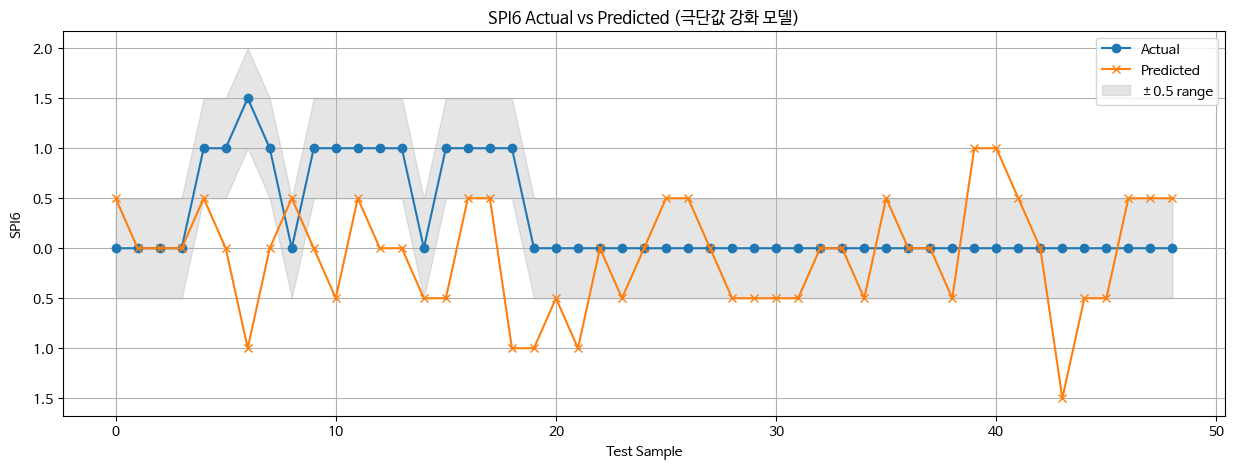

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

X = df.drop(['가뭄(MSWSI)', '가뭄(SPI6)'], axis=1)
y = df['가뭄(SPI6)']

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 시퀀스 생성 (과거 3주)
# ------------------------
def create_sequences(X, y, seq_len=3):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

seq_len = 3
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, seq_len)

# ------------------------
# 극단값 데이터 증강
# ------------------------
def augment_extreme(X_seq, y_seq, extreme_classes=[-1.5, 1.0, 1.5, 2.0], factor=3, noise_std=0.01):
    X_aug, y_aug = [X_seq], [y_seq]
    for cls in extreme_classes:
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_aug.append((X_seq[i] + noise)[np.newaxis])
                y_aug.append(np.array([cls], dtype=np.float32))
    return np.concatenate(X_aug, axis=0), np.concatenate(y_aug, axis=0)

X_train_seq, y_train_seq = augment_extreme(X_train_seq, y_train_seq)

# ------------------------
# 클래스별 가중치 MSE
# ------------------------
class_weights = {-1.5:3, -1.0:2, -0.5:1, 0.0:1, 0.5:1, 1.0:3, 1.5:3, 2.0:3}

def weighted_mse(y_true, y_pred):
    w = tf.zeros_like(y_true, dtype=tf.float32)
    for cls, weight in class_weights.items():
        cls_f = tf.constant(cls, dtype=tf.float32)
        weight_f = tf.constant(weight, dtype=tf.float32)
        w += tf.where(tf.equal(y_true, cls_f), weight_f, 0.0)
    return tf.reduce_mean(w * tf.square(y_true - y_pred))

# ------------------------
# 모델 정의
# ------------------------
def build_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=weighted_mse)
    return model

model = build_model((X_train_seq.shape[1], X_train_seq.shape[2]))

# ------------------------
# 학습
# ------------------------
model.fit(
    X_train_seq, y_train_seq,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측 및 라운딩/클리핑
# ------------------------
y_pred = model.predict(X_test_seq).flatten()
y_pred_clipped = np.clip(y_pred, -2, 2)
y_pred_rounded = np.round(y_pred_clipped * 2)/2

# ------------------------
# 평가 및 시각화
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    prox_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {prox_acc:.3f}")

    for cls in np.unique(y_true):
        idx = y_true == cls
        cls_acc = np.mean(np.abs(y_pred[idx] - cls) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {cls_acc:.2f}")

    plt.figure(figsize=(15,5))
    plt.plot(y_true, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.fill_between(range(len(y_true)), y_true-0.5, y_true+0.5, color='gray', alpha=0.2, label='±0.5 range')
    plt.xlabel('Test Sample')
    plt.ylabel('SPI6')
    plt.title('SPI6 Actual vs Predicted (극단값 강화 모델)')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(y_test_seq, y_pred_rounded)


더 더 올리기

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6499 - val_loss: 0.6019 - learning_rate: 0.0010
Epoch 2/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.4777 - val_loss: 0.5940 - learning_rate: 0.0010
Epoch 3/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4378 - val_loss: 0.6490 - learning_rate: 0.0010
Epoch 4/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4251 - val_loss: 0.5094 - learning_rate: 0.0010
Epoch 5/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4094 - val_loss: 0.5444 - learning_rate: 0.0010
Epoch 6/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4019 - val_loss: 0.5275 - learning_rate: 0.0010
Epoch 7/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4224 - val_loss: 0.4603 - learning_rate: 0.0010
Epoch 8/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3964 - val_loss: 0.4271 - learning_rate: 0.0010
Epoch 9/150
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4136 - val_loss: 0.4533 - learning_rate: 0.0010
Epoch 10/150


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


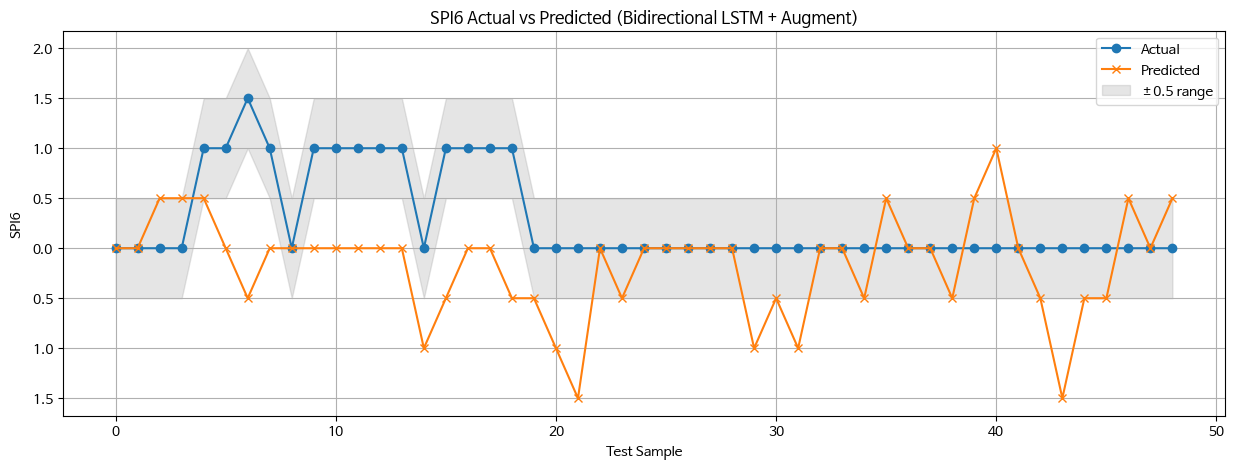

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ------------------------
# 데이터
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')
X = df.drop(['가뭄(MSWSI)','가뭄(SPI6)'], axis=1)
y = df['가뭄(SPI6)']

test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# 시퀀스 생성
# ------------------------
def create_sequences(X, y, seq_len=3):
    X_seq, y_seq = [], []
    for i in range(seq_len, len(X)):
        X_seq.append(X[i-seq_len:i])
        y_seq.append(y[i])
    return np.array(X_seq), np.array(y_seq)

seq_len = 3
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train.values, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test.values, seq_len)

# ------------------------
# 전체 클래스 증강
# ------------------------
def augment_all_classes(X_seq, y_seq, factor=2, noise_std=0.01):
    X_aug, y_aug = [X_seq], [y_seq]
    unique_classes = np.unique(y_seq)
    for cls in unique_classes:
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_aug.append((X_seq[i]+noise)[np.newaxis])
                y_aug.append(np.array([cls], dtype=np.float32))
    return np.concatenate(X_aug, axis=0), np.concatenate(y_aug, axis=0)

X_train_seq, y_train_seq = augment_all_classes(X_train_seq, y_train_seq, factor=2)

# ------------------------
# 클래스 가중치 MSE
# ------------------------
class_weights = {-1.5:3, -1.0:2, -0.5:1, 0.0:1, 0.5:1, 1.0:2, 1.5:3, 2.0:3}

def weighted_mse(y_true, y_pred):
    w = tf.zeros_like(y_true, dtype=tf.float32)
    for cls, weight in class_weights.items():
        cls_f = tf.constant(cls, dtype=tf.float32)
        weight_f = tf.constant(weight, dtype=tf.float32)
        w += tf.where(tf.equal(y_true, cls_f), weight_f, 0.0)
    return tf.reduce_mean(w * tf.square(y_true - y_pred))

# ------------------------
# 모델 정의 (Bidirectional LSTM)
# ------------------------
def build_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=weighted_mse)
    return model

model = build_model((X_train_seq.shape[1], X_train_seq.shape[2]))

# ------------------------
# 학습
# ------------------------
model.fit(
    X_train_seq, y_train_seq,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측
# ------------------------
y_pred = model.predict(X_test_seq).flatten()
y_pred_clipped = np.clip(y_pred, -2, 2)
y_pred_rounded = np.round(y_pred_clipped*2)/2

# ------------------------
# 평가
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    prox_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {prox_acc:.3f}")

    for cls in np.unique(y_true):
        idx = y_true == cls
        cls_acc = np.mean(np.abs(y_pred[idx]-cls) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {cls_acc:.2f}")

    # 시각화
    plt.figure(figsize=(15,5))
    plt.plot(y_true, label='Actual', marker='o')
    plt.plot(y_pred, label='Predicted', marker='x')
    plt.fill_between(range(len(y_true)), y_true-0.5, y_true+0.5, color='gray', alpha=0.2, label='±0.5 range')
    plt.xlabel('Test Sample')
    plt.ylabel('SPI6')
    plt.title('SPI6 Actual vs Predicted (Bidirectional LSTM + Augment)')
    plt.legend()
    plt.grid(True)
    plt.show()

evaluate_model(y_test_seq, y_pred_rounded)


더...해보기

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 1.2180 - val_loss: 1.9456 - learning_rate: 0.0010
Epoch 2/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.7040 - val_loss: 1.8479 - learning_rate: 0.0010
Epoch 3/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6192 - val_loss: 1.7973 - learning_rate: 0.0010
Epoch 4/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5961 - val_loss: 1.4733 - learning_rate: 0.0010
Epoch 5/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5755 - val_loss: 1.2366 - learning_rate: 0.0010
Epoch 6/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4700 - val_loss: 1.3001 - learning_rate: 0.0010
Epoch 7/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4221 - val_loss: 1.2492 - learning_rate: 0.0010
Epoch 8/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4008 - val_loss: 1.1845 - learning_rate: 0.0010
Epoch 9/150
436/436 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3656 - val_loss: 0.7719 - learning_rate: 0.0010
E

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


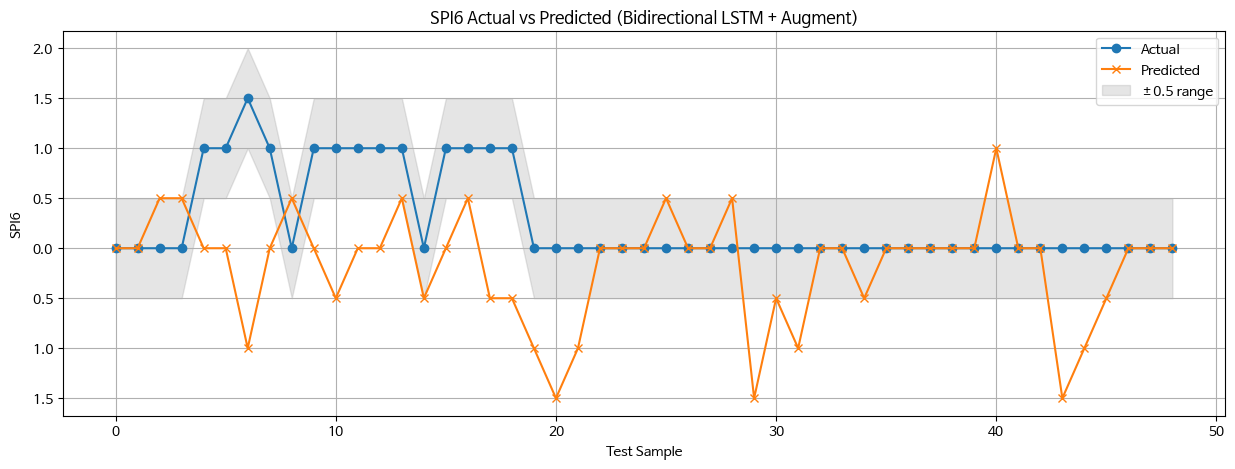

In [ ]:
# ------------------------
# 극단값 증강 함수
# ------------------------
def augment_extreme_classes(X_seq, y_seq, factor_dict, noise_std=0.01):
    X_new, y_new = [X_seq], [y_seq]
    for cls, factor in factor_dict.items():
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_new.append((X_seq[i]+noise)[np.newaxis])
                y_new.append(np.array([cls], dtype=np.float32))
    return np.concatenate(X_new, axis=0), np.concatenate(y_new, axis=0)

# 극단값 + 소수 클래스 증강 비율 설정
factor_dict = {-1.5:5, -1.0:3, -0.5:2, 0.0:1, 0.5:2, 1.0:3, 1.5:5, 2.0:5}
X_train_seq_bal, y_train_seq_bal = augment_extreme_classes(X_train_seq, y_train_seq, factor_dict)

# ------------------------
# 극단값 강조 weighted MSE
# ------------------------
extreme_class_weights = {-1.5:5, -1.0:3, -0.5:1, 0.0:1, 0.5:1, 1.0:3, 1.5:5, 2.0:5}

def weighted_mse_extreme(y_true, y_pred):
    w = tf.zeros_like(y_true, dtype=tf.float32)
    for cls, weight in extreme_class_weights.items():
        cls_f = tf.constant(cls, dtype=tf.float32)
        weight_f = tf.constant(weight, dtype=tf.float32)
        w += tf.where(tf.equal(y_true, cls_f), weight_f, 0.0)
    return tf.reduce_mean(w * tf.square(y_true - y_pred))

# ------------------------
# 모델 정의
# ------------------------
def build_model_extreme(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=weighted_mse_extreme)
    return model

model_extreme = build_model_extreme((X_train_seq_bal.shape[1], X_train_seq_bal.shape[2]))

# ------------------------
# 학습
# ------------------------
model_extreme.fit(
    X_train_seq_bal, y_train_seq_bal,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측 & 평가
# ------------------------
y_pred = model_extreme.predict(X_test_seq).flatten()
y_pred_clipped = np.clip(y_pred, -2, 2)
y_pred_rounded = np.round(y_pred_clipped*2)/2

evaluate_model(y_test_seq, y_pred_rounded)


혼합모델

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')
target = ['가뭄(SPI6)']  # SPI6만
X = df.drop(target, axis=1)
y = df[target].values.flatten()  # 1D

# ------------------------
# Train/Test 분리
# ------------------------
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_robust = scaler.fit_transform(X_train)
X_test_robust = scaler.transform(X_test)

# ------------------------
# LSTM용 시퀀스 생성
# ------------------------
def create_sequences(X, y, seq_len=3):
    X_seq, y_seq = [], []
    for i in range(len(X)-seq_len+1):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len-1])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)

seq_len = 3
X_train_seq, y_train_seq = create_sequences(X_train_robust, y_train, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_robust, y_test, seq_len)

# ------------------------
# 극단값 증강 함수
# ------------------------
def augment_extreme_classes(X_seq, y_seq, factor_dict, noise_std=0.01):
    X_new, y_new = [X_seq], [y_seq]
    for cls, factor in factor_dict.items():
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_new.append((X_seq[i]+noise)[np.newaxis])
                y_new.append(np.array([cls], dtype=np.float32))
    return np.concatenate(X_new, axis=0), np.concatenate(y_new, axis=0)

factor_dict = {-1.5:5, -1.0:3, -0.5:2, 0.0:1, 0.5:2, 1.0:3, 1.5:5, 2.0:5}
X_train_seq_bal, y_train_seq_bal = augment_extreme_classes(X_train_seq, y_train_seq, factor_dict)

# ------------------------
# LSTM 모델 정의
# ------------------------
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model_lstm = build_lstm_model((X_train_seq_bal.shape[1], X_train_seq_bal.shape[2]))

# ------------------------
# LSTM 학습
# ------------------------
model_lstm.fit(
    X_train_seq_bal, y_train_seq_bal,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, min_lr=1e-5)],
    verbose=1
)

# ------------------------
# 극단값 전용 LightGBM 학습
# ------------------------
extreme_labels = [-1.5, 1.5, 2.0]
y_train_extreme = np.where(np.isin(y_train, extreme_labels), y_train, 0)

lgb_train = lgb.Dataset(X_train_robust, label=y_train_extreme)
params = {'objective':'regression', 'metric':'rmse', 'learning_rate':0.05, 'num_leaves':31, 'min_data_in_leaf':5}
lgb_extreme_model = lgb.train(params, lgb_train, num_boost_round=200)

# ------------------------
# 예측 통합
# ------------------------
y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_extreme = lgb_extreme_model.predict(X_test_robust[-len(X_test_seq):])

for i in range(len(y_pred_lstm)):
    if abs(y_pred_extreme[i]) in extreme_labels and y_pred_extreme[i] != 0:
        y_pred_lstm[i] = y_pred_extreme[i]

# 라운딩 ±0.5
y_pred_rounded = np.round(y_pred_lstm*2)/2

# ------------------------
# 평가 함수
# ------------------------
from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report

def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    # ±0.5 근접 정확도
    close_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {close_acc:.3f}")

    # 클래스별 근접 정확도
    classes = sorted(np.unique(y_true))
    for cls in classes:
        idx = np.where(y_true == cls)[0]
        acc = np.mean(np.abs(y_true[idx]-y_pred[idx]) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {acc:.2f}")

# ------------------------
# 평가 실행
# ------------------------
evaluate_model(y_test_seq, y_pred_rounded)


Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


146/146 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4361 - val_loss: 0.5178 - learning_rate: 0.0010
Epoch 2/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3213 - val_loss: 0.4759 - learning_rate: 0.0010
Epoch 3/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2910 - val_loss: 0.5091 - learning_rate: 0.0010
Epoch 4/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2696 - val_loss: 0.4426 - learning_rate: 0.0010
Epoch 5/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2832 - val_loss: 0.4807 - learning_rate: 0.0010
Epoch 6/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2726 - val_loss: 0.3435 - learning_rate: 0.0010
Epoch 7/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2496 - val_loss: 0.5187 - learning_rate: 0.0010
Epoch 8/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2471 - val_loss: 0.3705 - learning_rate: 0.0010
Epoch 9/150
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2309 - val_loss: 0.3547 - learning_rate: 0.0010
Epoch 10/150


SPI6 LSTM + 극단값 강화 XGBoost 혼합 모델

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


156/156 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4417 - val_loss: 0.6557 - learning_rate: 0.0010
Epoch 2/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3006 - val_loss: 0.4428 - learning_rate: 0.0010
Epoch 3/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2498 - val_loss: 0.5414 - learning_rate: 0.0010
Epoch 4/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2240 - val_loss: 0.4197 - learning_rate: 0.0010
Epoch 5/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2067 - val_loss: 0.3198 - learning_rate: 0.0010
Epoch 6/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2110 - val_loss: 0.3809 - learning_rate: 0.0010
Epoch 7/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1766 - val_loss: 0.4250 - learning_rate: 0.0010
Epoch 8/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1686 - val_loss: 0.3327 - learning_rate: 0.0010
Epoch 9/200
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1611 - val_loss: 0.3415 - learning_rate: 0.0010
Epoch 10/200


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


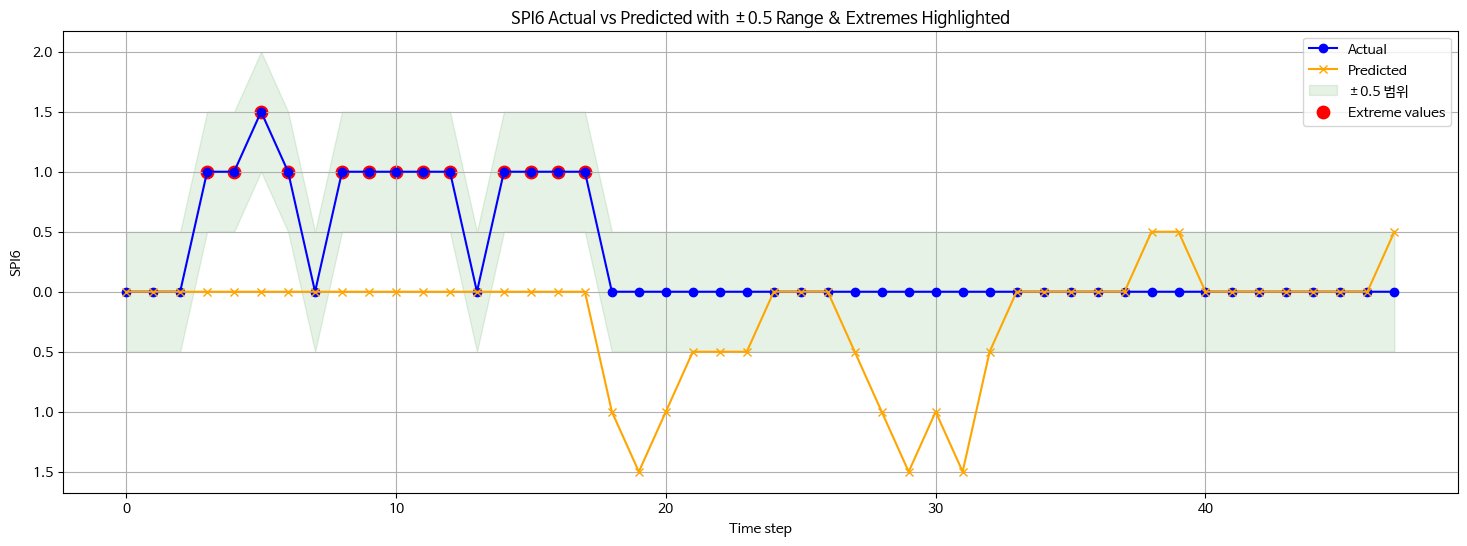

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')
target = ['가뭄(SPI6)']  # SPI6만
X = df.drop(target, axis=1)
y = df[target].values.flatten()  # 1D

# ------------------------
# Train/Test 분리
# ------------------------
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# LSTM용 시퀀스 생성
# ------------------------
def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X)-seq_len+1):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len-1])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)

seq_len = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, seq_len)

# ------------------------
# 극단값 증강
# ------------------------
def augment_extreme_classes(X_seq, y_seq, factor_dict, noise_std=0.02):
    X_new, y_new = [X_seq], [y_seq]
    for cls, factor in factor_dict.items():
        idx = np.where(y_seq == cls)[0]
        for i in idx:
            for _ in range(factor):
                noise = np.random.normal(0, noise_std, X_seq[i].shape)
                X_new.append((X_seq[i]+noise)[np.newaxis])
                y_new.append(np.array([cls], dtype=np.float32))
    return np.concatenate(X_new, axis=0), np.concatenate(y_new, axis=0)

factor_dict = {-1.5:6, -1.0:4, -0.5:2, 0.0:1, 0.5:2, 1.0:3, 1.5:5, 2.0:5}
X_train_seq_bal, y_train_seq_bal = augment_extreme_classes(X_train_seq, y_train_seq, factor_dict)

# ------------------------
# LSTM 모델 정의
# ------------------------
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

model_lstm = build_lstm_model((X_train_seq_bal.shape[1], X_train_seq_bal.shape[2]))

# ------------------------
# LSTM 학습
# ------------------------
model_lstm.fit(
    X_train_seq_bal, y_train_seq_bal,
    epochs=200, batch_size=8,
    validation_split=0.2,
    callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
               ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)],
    verbose=1
)

# ------------------------
# 극단값 전용 XGBoost
# ------------------------
extreme_labels = [-1.5, 1.5, 2.0]
y_train_extreme = np.where(np.isin(y_train, extreme_labels), y_train, 0)

xgb_extreme_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05
)
xgb_extreme_model.fit(X_train_scaled, y_train_extreme)

# ------------------------
# 예측 통합
# ------------------------
y_pred_lstm = model_lstm.predict(X_test_seq).flatten()
y_pred_extreme = xgb_extreme_model.predict(X_test_scaled[-len(X_test_seq):])

for i in range(len(y_pred_lstm)):
    if abs(y_pred_extreme[i]) in extreme_labels and y_pred_extreme[i] != 0:
        y_pred_lstm[i] = y_pred_extreme[i]

# 라운딩 ±0.5
y_pred_rounded = np.round(y_pred_lstm*2)/2

# ------------------------
# 평가 함수
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    close_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {close_acc:.3f}")

    classes = sorted(np.unique(y_true))
    for cls in classes:
        idx = np.where(y_true == cls)[0]
        acc = np.mean(np.abs(y_true[idx]-y_pred[idx]) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {acc:.2f}")

# ------------------------
# 평가 실행
# ------------------------
evaluate_model(y_test_seq, y_pred_rounded)

# ------------------------
# 시각화 통합
# ------------------------
time_steps = np.arange(len(y_test_seq))
plt.figure(figsize=(18,6))
plt.plot(time_steps, y_test_seq, label='Actual', marker='o', color='blue')
plt.plot(time_steps, y_pred_rounded, label='Predicted', marker='x', color='orange')
plt.fill_between(time_steps, y_test_seq-0.5, y_test_seq+0.5, color='green', alpha=0.1, label='±0.5 범위')
extreme_mask = (y_test_seq <= -1.0) | (y_test_seq >= 1.0)
plt.scatter(time_steps[extreme_mask], y_test_seq[extreme_mask], color='red', s=80, label='Extreme values')
plt.title('SPI6 Actual vs Predicted with ±0.5 Range & Extremes Highlighted')
plt.xlabel('Time step')
plt.ylabel('SPI6')
plt.legend()
plt.grid(True)
plt.show()


성능 제일 높은것

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.3130 - val_loss: 0.2000 - learning_rate: 0.0010
Epoch 2/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2548 - val_loss: 0.2517 - learning_rate: 0.0010
Epoch 3/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2443 - val_loss: 0.2672 - learning_rate: 0.0010
Epoch 4/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1856 - val_loss: 0.2792 - learning_rate: 0.0010
Epoch 5/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2175 - val_loss: 0.2516 - learning_rate: 0.0010
Epoch 6/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2173 - val_loss: 0.2664 - learning_rate: 0.0010
Epoch 7/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2062 - val_loss: 0.2874 - learning_rate: 0.0010
Epoch 8/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1927 - val_loss: 0.2920 - learning_rate: 0.0010
Epoch 9/150
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1939 - val_loss: 0.2943 - learning_rate: 0.0010
Epoch 10/150
57/57 ━━━━━━━━━━━

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


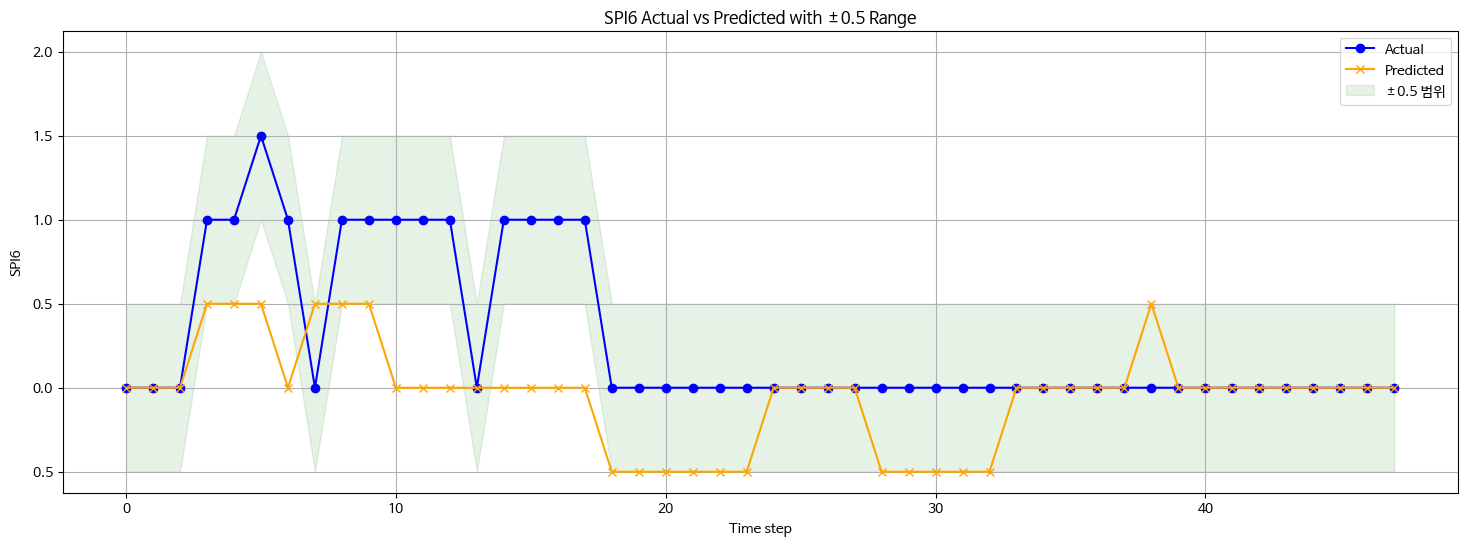

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# ------------------------
# 데이터 불러오기
# ------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')
target = ['가뭄(SPI6)']  # SPI6만 사용
X = df.drop(target, axis=1)
y = df[target].values.flatten()  # 1D

# ------------------------
# Train/Test 분리
# ------------------------
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# ------------------------
# 스케일링
# ------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------
# LSTM용 시퀀스 생성
# ------------------------
def create_sequences(X, y, seq_len=5):
    X_seq, y_seq = [], []
    for i in range(len(X)-seq_len+1):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len-1])
    return np.array(X_seq, dtype=np.float32), np.array(y_seq, dtype=np.float32)

seq_len = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train, seq_len)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, seq_len)

# ------------------------
# LSTM 모델 정의
# ------------------------
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# ------------------------
# 학습
# ------------------------
model.fit(
    X_train_seq, y_train_seq,
    epochs=150, batch_size=8,
    validation_split=0.2,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-5)
    ],
    verbose=1
)

# ------------------------
# 예측 및 라운딩
# ------------------------
y_pred = model.predict(X_test_seq).flatten()
y_pred_rounded = np.round(y_pred*2)/2  # ±0.5 단계 반올림

# ------------------------
# 평가 함수
# ------------------------
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"RMSE: {rmse:.4f}, MAE: {mae:.4f}")

    close_acc = np.mean(np.abs(y_true - y_pred) <= 0.5)
    print(f"근접 정확도 (±0.5 단계): {close_acc:.3f}")

    classes = sorted(np.unique(y_true))
    for cls in classes:
        idx = np.where(y_true == cls)[0]
        acc = np.mean(np.abs(y_true[idx]-y_pred[idx]) <= 0.5)
        print(f"Class {cls}: 근접 정확도 ±0.5 = {acc:.2f}")

evaluate_model(y_test_seq, y_pred_rounded)

# ------------------------
# 시각화
# ------------------------
time_steps = np.arange(len(y_test_seq))
plt.figure(figsize=(18,6))
plt.plot(time_steps, y_test_seq, label='Actual', marker='o', color='blue')
plt.plot(time_steps, y_pred_rounded, label='Predicted', marker='x', color='orange')
plt.fill_between(time_steps, y_test_seq-0.5, y_test_seq+0.5, color='green', alpha=0.1, label='±0.5 범위')
plt.title('SPI6 Actual vs Predicted with ±0.5 Range')
plt.xlabel('Time step')
plt.ylabel('SPI6')
plt.legend()
plt.grid(True)
plt.show()


#일반 모델

1차

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4031 - loss: 1.6568 - val_accuracy: 0.8070 - val_loss: 1.1562
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7759 - loss: 0.9461 - val_accuracy: 0.8070 - val_loss: 0.8142
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7946 - loss: 0.7640 - val_accuracy: 0.8070 - val_loss: 0.7193
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8013 - loss: 0.7238 - val_accuracy: 0.8070 - val_loss: 0.6483
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7819 - loss: 0.7158 - val_accuracy: 0.8070 - val_loss: 0.6006
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7971 - loss: 0.6797 - val_accuracy: 0.8158 - val_loss: 0.6041
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8004 - loss: 0.6228 - val_accuracy: 0.8070 - val_loss: 0.5572
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7728 - loss: 0.6720 - val_accuracy: 0.8070 - val_l

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


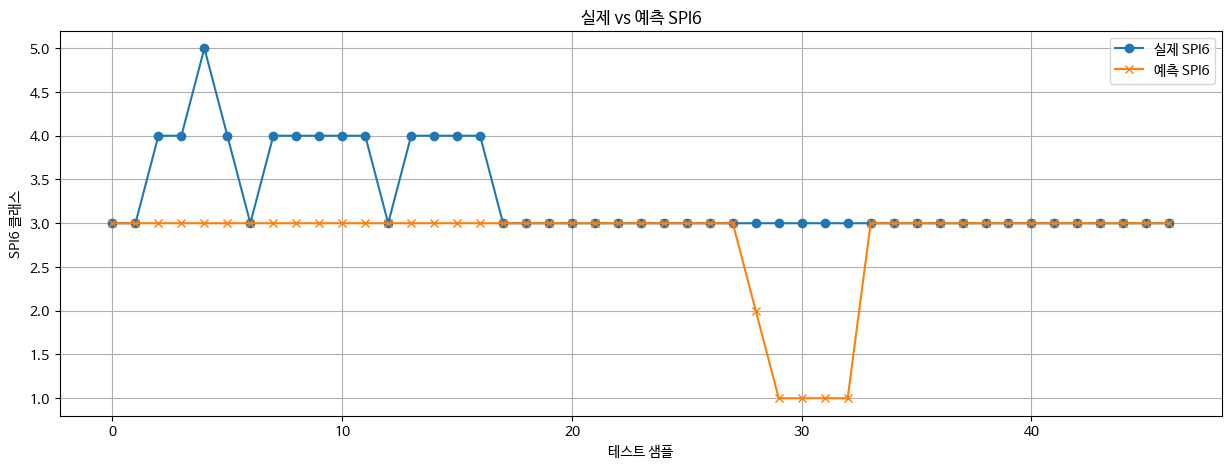

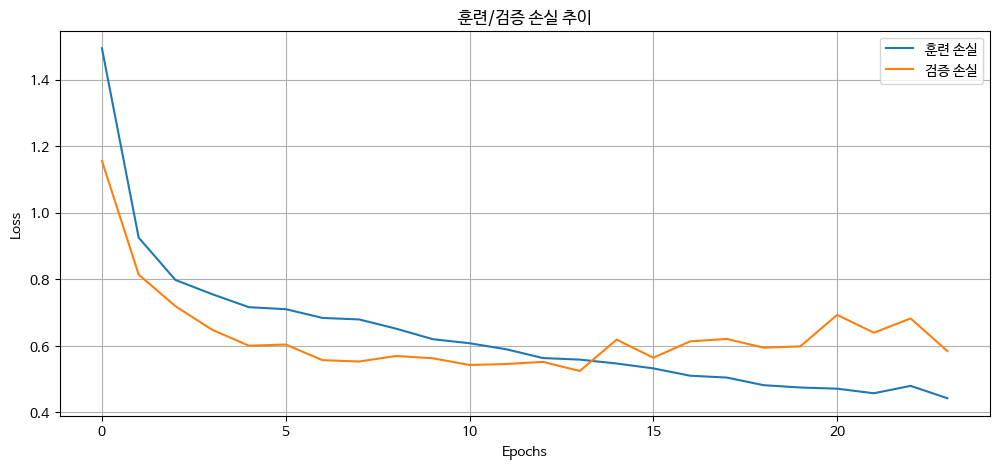

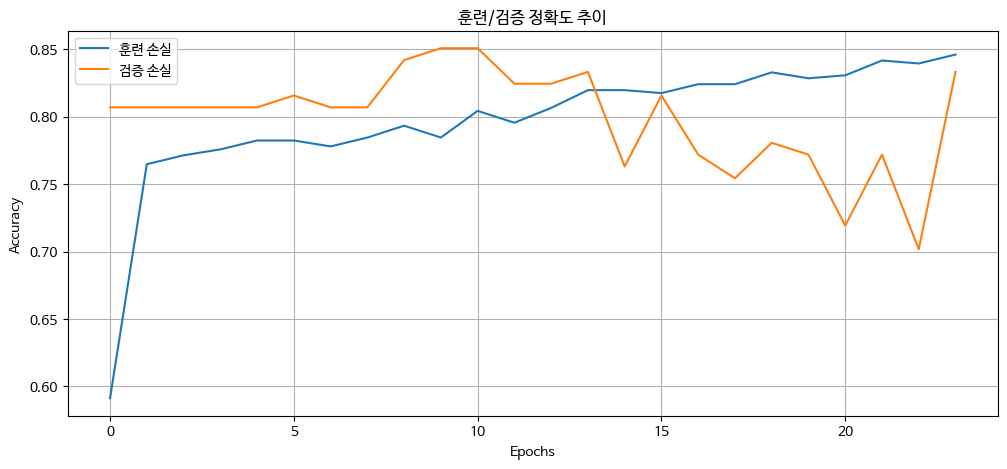

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)  # MSWSI 포함 가능
y = df[target]

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# 스케일링
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩 (범주형)
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 5
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(64, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # 범주형 분류
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

unique_labels = np.unique(y_test_seq)

print("\n=== 상세 분류 리포트 ===")
print(classification_report(
    y_test_seq,
    y_pred_class,
    labels=unique_labels,  # 실제 등장한 클래스만 사용
    target_names=le.classes_[unique_labels].astype(str)  # 그에 맞는 클래스명만 매칭
))

# -----------------------------
# 8. 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6', marker='o')
plt.plot(y_pred_class, label='예측 SPI6', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('SPI6 클래스')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 9. 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 손실')
plt.plot(history.history['val_accuracy'], label='검증 손실')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2차

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0844 - loss: 2.5368 - val_accuracy: 0.1930 - val_loss: 1.7520
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1868 - loss: 1.5457 - val_accuracy: 0.1228 - val_loss: 1.6052
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2195 - loss: 1.5942 - val_accuracy: 0.1140 - val_loss: 1.5040
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2268 - loss: 2.0105 - val_accuracy: 0.2105 - val_loss: 1.4370
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2809 - loss: 1.3843 - val_accuracy: 0.2982 - val_loss: 1.4453
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2625 - loss: 1.1777 - val_accuracy: 0.1842 - val_loss: 1.4820
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2659 - loss: 1.0018 - val_accuracy: 0.1491 - val_loss: 1.5843
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3150 - loss: 0.8624 - val_accuracy: 0.2368 - val_loss: 1.

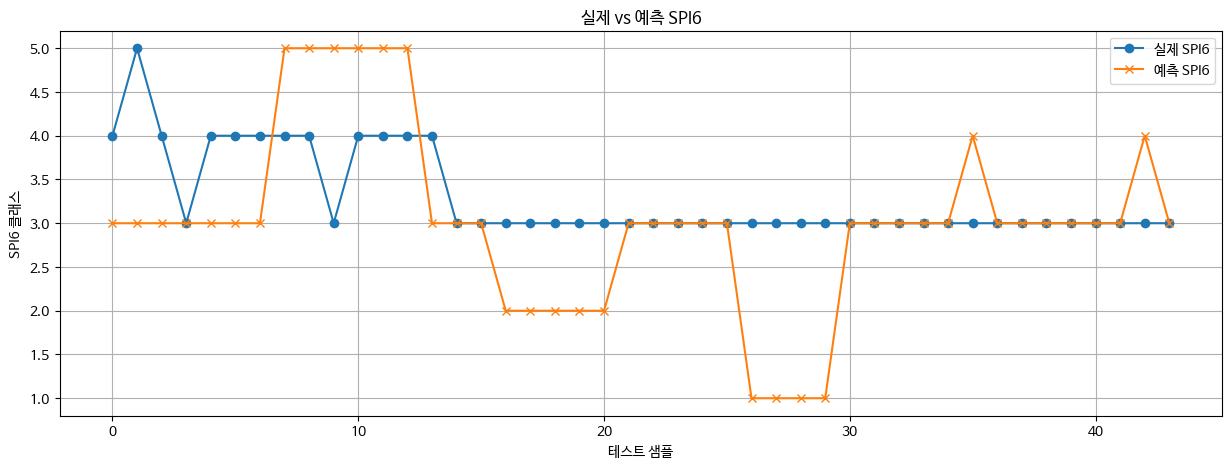

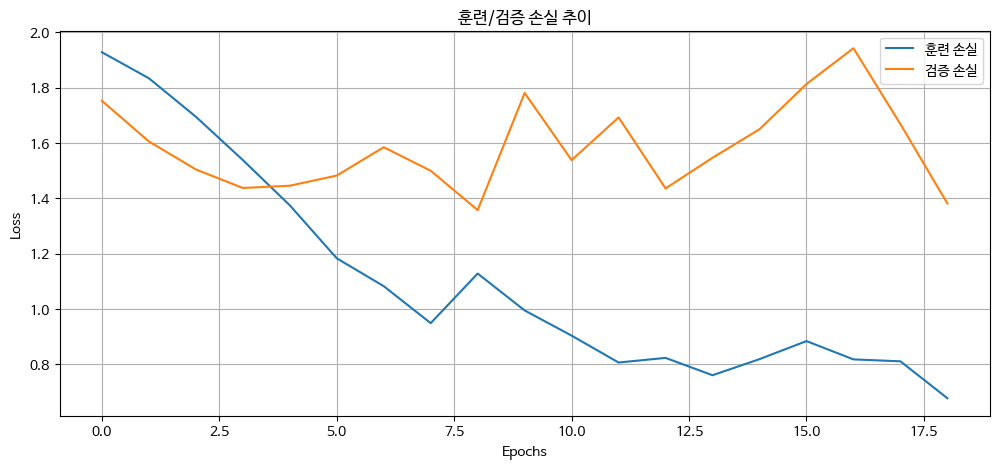

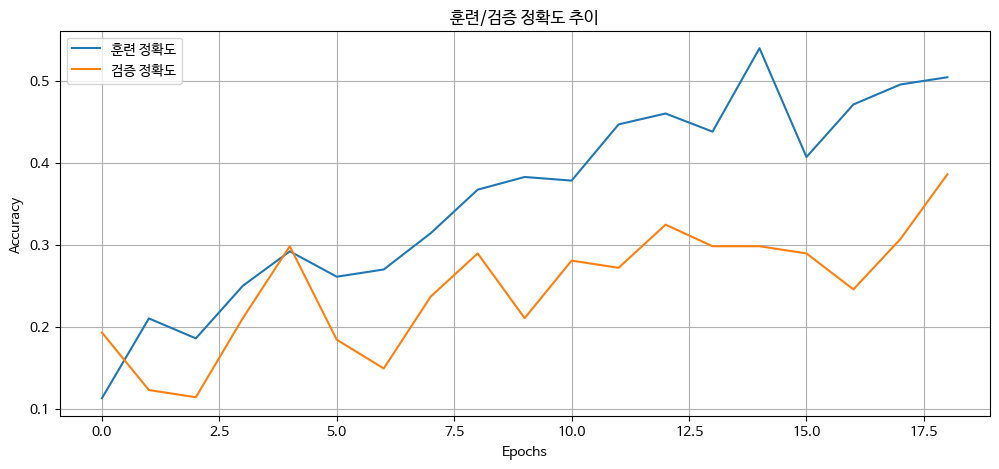

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)  # MSWSI 포함 가능
y = df[target]

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train, y_test = y[:-test_size], y[-test_size:]

# 스케일링
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩 (범주형)
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# 클래스 가중치 계산
# -----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weights_dict = dict(enumerate(class_weights))

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(128, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=150,
    batch_size=16,
    class_weight=class_weights_dict,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

# -----------------------------
# 평가
# -----------------------------
acc  = accuracy_score(y_test_seq, y_pred_class)
prec = precision_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
rec  = recall_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
f1   = f1_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6', marker='o')
plt.plot(y_pred_class, label='예측 SPI6', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('SPI6 클래스')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 3개 범주로 축소

1차

Epoch 1/150


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3642 - loss: 0.9963 - val_accuracy: 0.5351 - val_loss: 1.0372
Epoch 2/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5828 - loss: 1.1394 - val_accuracy: 0.3421 - val_loss: 1.0416
Epoch 3/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4627 - loss: 0.8948 - val_accuracy: 0.3772 - val_loss: 0.9795
Epoch 4/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4810 - loss: 0.8611 - val_accuracy: 0.3070 - val_loss: 1.0828
Epoch 5/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4189 - loss: 0.7337 - val_accuracy: 0.3596 - val_loss: 1.0610
Epoch 6/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5043 - loss: 0.7433 - val_accuracy: 0.3596 - val_loss: 1.0946
Epoch 7/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5128 - loss: 0.6205 - val_accuracy: 0.4123 - val_loss: 1.1647
Epoch 8/150
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5546 - loss: 0.6430 - val_accuracy: 0.3684 - val_loss: 1.

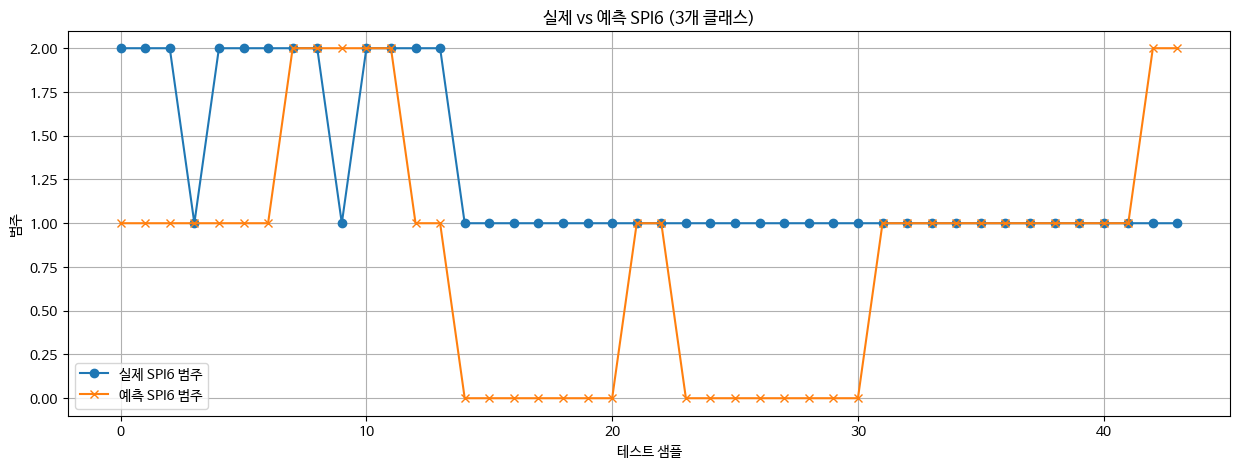

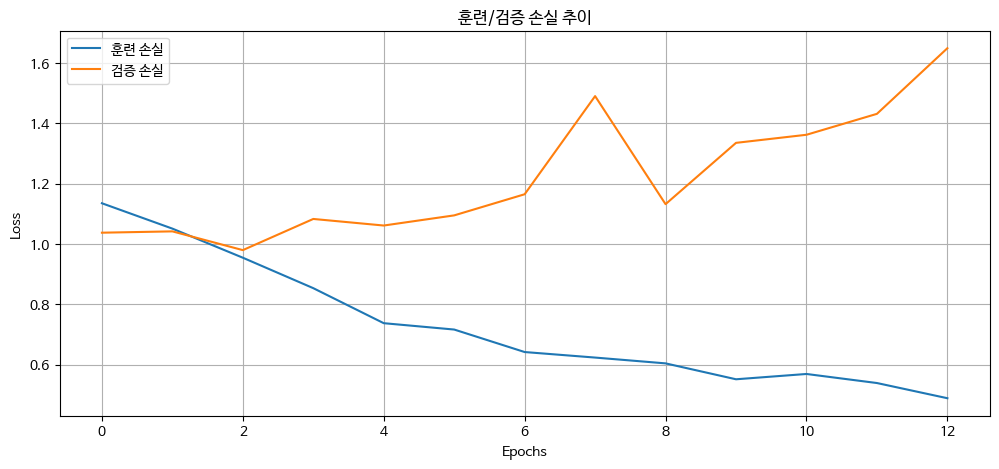

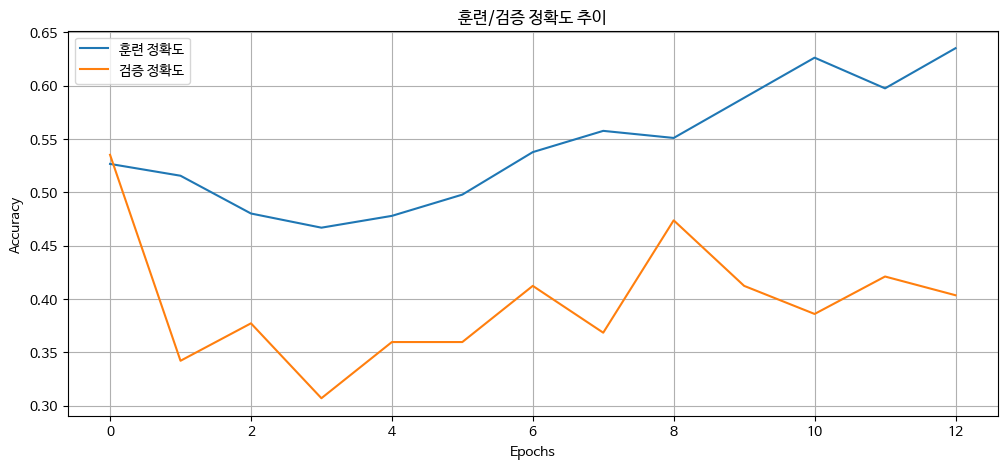

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)  # MSWSI 포함 가능
y = df[target]

# -----------------------------
# y 3개 범주로 변환
# -----------------------------
def categorize_y(y):
    y_new = []
    for val in y:
        if val < 0:
            y_new.append(-1)
        elif val == 0:
            y_new.append(0)
        else:
            y_new.append(1)
    return np.array(y_new)

y_cat = categorize_y(y)

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train_cat, y_test_cat = y_cat[:-test_size], y_cat[-test_size:]

# -----------------------------
# 스케일링
# -----------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_cat)
y_test_enc  = le.transform(y_test_cat)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=8):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 8
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# 클래스 가중치 계산
# -----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weights_dict = dict(enumerate(class_weights))

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(128, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # 3개 클래스
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=150,
    batch_size=16,
    class_weight=class_weights_dict,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

# -----------------------------
# 평가
# -----------------------------
acc  = accuracy_score(y_test_seq, y_pred_class)
prec = precision_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
rec  = recall_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
f1   = f1_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6 범주', marker='o')
plt.plot(y_pred_class, label='예측 SPI6 범주', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('범주')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2차

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.3307 - loss: 1.0127 - val_accuracy: 0.3805 - val_loss: 1.0362
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4828 - loss: 1.0110 - val_accuracy: 0.3451 - val_loss: 0.9587
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4530 - loss: 0.8046 - val_accuracy: 0.4602 - val_loss: 0.8555
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4986 - loss: 0.7662 - val_accuracy: 0.4956 - val_loss: 0.8332
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5558 - loss: 0.7002 - val_accuracy: 0.3451 - val_loss: 1.1215
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5566 - loss: 0.5526 - val_accuracy: 0.5133 - val_loss: 0.8584
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5610 - loss: 0.6128 - val_accuracy: 0.5310 - val_loss: 1.0928
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6293 - loss: 0.5085 - val_accuracy: 0.

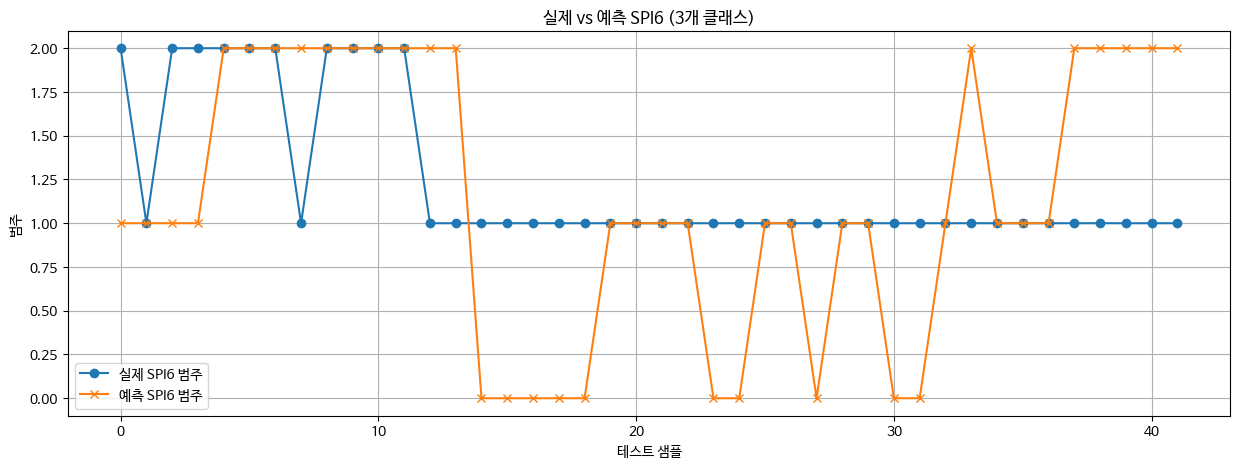

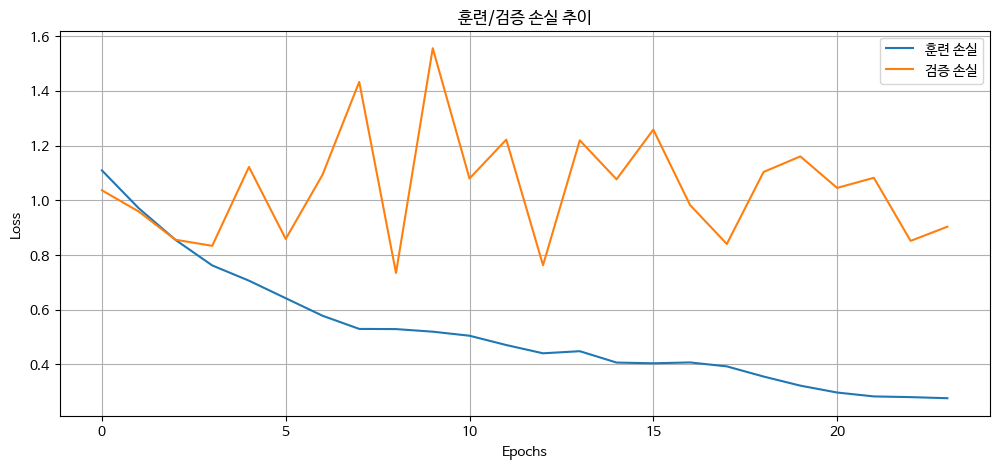

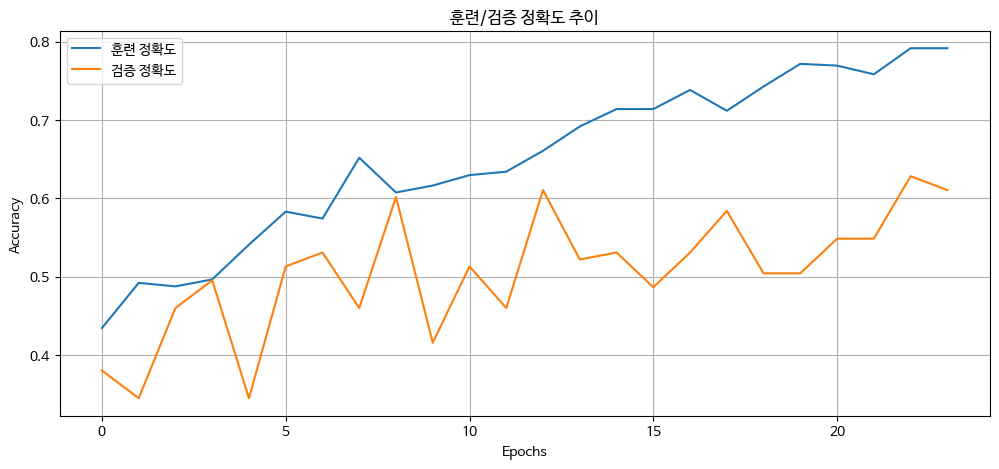

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)  # MSWSI 포함 가능
y = df[target]

# -----------------------------
# y 3개 범주로 변환
# -----------------------------
def categorize_y(y):
    y_new = []
    for val in y:
        if val < 0:
            y_new.append(-1)
        elif val == 0:
            y_new.append(0)
        else:
            y_new.append(1)
    return np.array(y_new)

y_cat = categorize_y(y)

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train_cat, y_test_cat = y_cat[:-test_size], y_cat[-test_size:]

# -----------------------------
# 스케일링
# -----------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_cat)
y_test_enc  = le.transform(y_test_cat)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# 클래스 가중치 계산
# -----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weights_dict = dict(enumerate(class_weights))

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(160, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # 3개 클래스
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    class_weight=class_weights_dict,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

# -----------------------------
# 평가
# -----------------------------
acc  = accuracy_score(y_test_seq, y_pred_class)
prec = precision_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
rec  = recall_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
f1   = f1_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6 범주', marker='o')
plt.plot(y_pred_class, label='예측 SPI6 범주', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('범주')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 2개 범주로 축소

1차

Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4126 - loss: 0.6928 - val_accuracy: 0.6637 - val_loss: 0.6688
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7068 - loss: 0.5882 - val_accuracy: 0.6814 - val_loss: 0.5949
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7451 - loss: 0.5870 - val_accuracy: 0.7434 - val_loss: 0.5067
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7569 - loss: 0.5086 - val_accuracy: 0.6549 - val_loss: 0.5482
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7976 - loss: 0.4089 - val_accuracy: 0.6814 - val_loss: 0.7004
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8281 - loss: 0.4085 - val_accuracy: 0.7434 - val_loss: 0.6611
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8468 - loss: 0.3819 - val_accuracy: 0.8319 - val_loss: 0.4796
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8674 - loss: 0.3836 - val_accuracy: 0.7345 - val_l

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== 상세 분류 리포트 ===
              precision    recall  f1-score   support

      비가뭄(0)       0.00      0.00      0.00         0
       가뭄(1)       1.00      0.95      0.98        42

    accuracy                           0.95        42
   macro avg       0.50      0.48      0.49        42
weighted avg       1.00      0.95      0.98        42



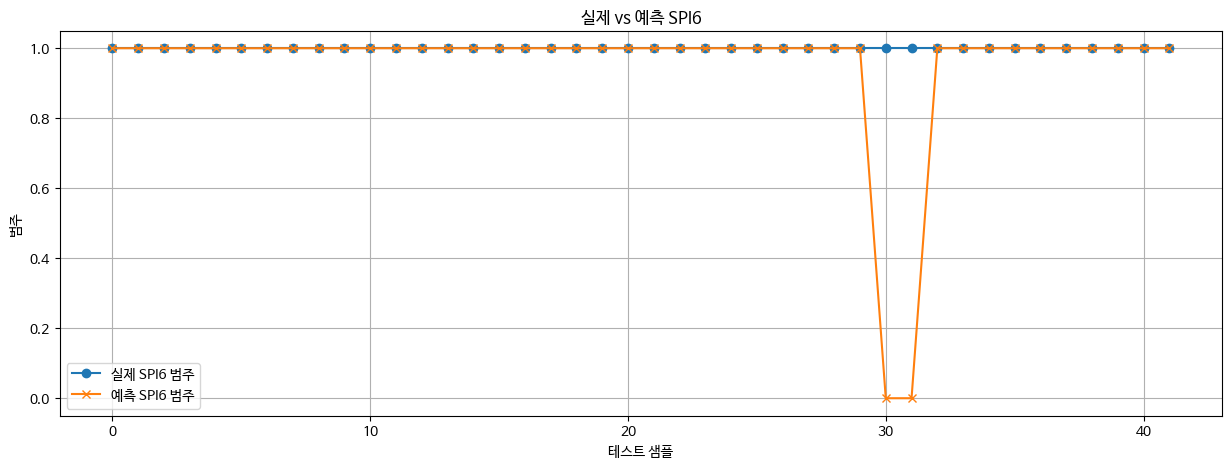

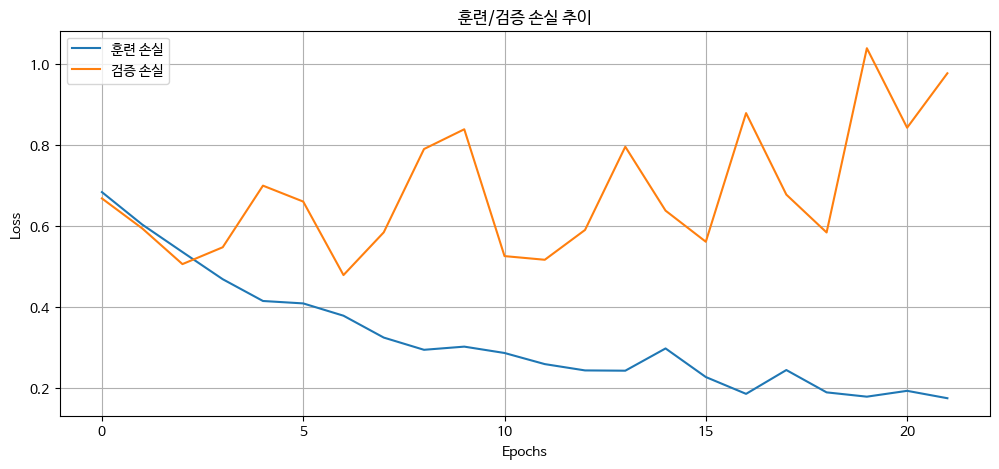

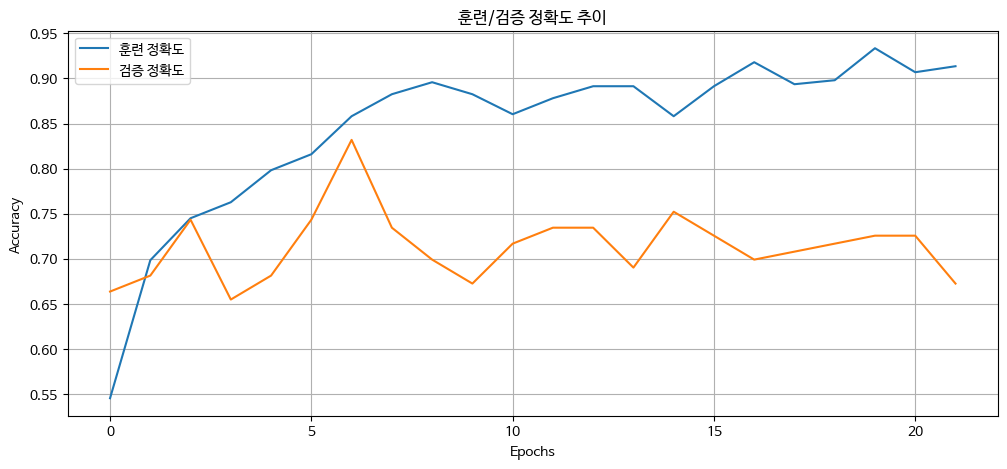

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)  # MSWSI 포함 가능
y = df[target]

# -----------------------------
# y 2개 범주로 변환
# -----------------------------
def categorize_y_binary(y):
    return np.array([0 if val < 0 else 1 for val in y])

y_bin = categorize_y_binary(y)

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train_bin, y_test_bin = y_bin[:-test_size], y_bin[-test_size:]

# -----------------------------
# 스케일링
# -----------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_bin)
y_test_enc  = le.transform(y_test_bin)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# 클래스 가중치 계산
# -----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weights_dict = dict(enumerate(class_weights))

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(160, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')  # 2개 클래스
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=200,
    batch_size=16,
    class_weight=class_weights_dict,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

# -----------------------------
# 평가
# -----------------------------
print("\n=== 상세 분류 리포트 ===")
print(classification_report(
    y_test_seq,
    y_pred_class,
    target_names=["비가뭄(0)", "가뭄(1)"]  # 라벨값과 의미를 같이 표시
))


# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6 범주', marker='o')
plt.plot(y_pred_class, label='예측 SPI6 범주', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('범주')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


2차

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7383 - loss: 0.6440 - val_accuracy: 0.7257 - val_loss: 0.6187
Epoch 2/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7677 - loss: 0.5203 - val_accuracy: 0.6283 - val_loss: 0.6612
Epoch 3/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7981 - loss: 0.4201 - val_accuracy: 0.7788 - val_loss: 0.5052
Epoch 4/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8257 - loss: 0.4180 - val_accuracy: 0.6549 - val_loss: 0.6717
Epoch 5/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8752 - loss: 0.2802 - val_accuracy: 0.6991 - val_loss: 0.6854
Epoch 6/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8833 - loss: 0.2986 - val_accuracy: 0.8053 - val_loss: 0.4908
Epoch 7/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8987 - loss: 0.2840 - val_accuracy: 0.6991 - val_loss: 0.6287
Epoch 8/200
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8904 - loss: 0.2927 - val_accuracy: 0.

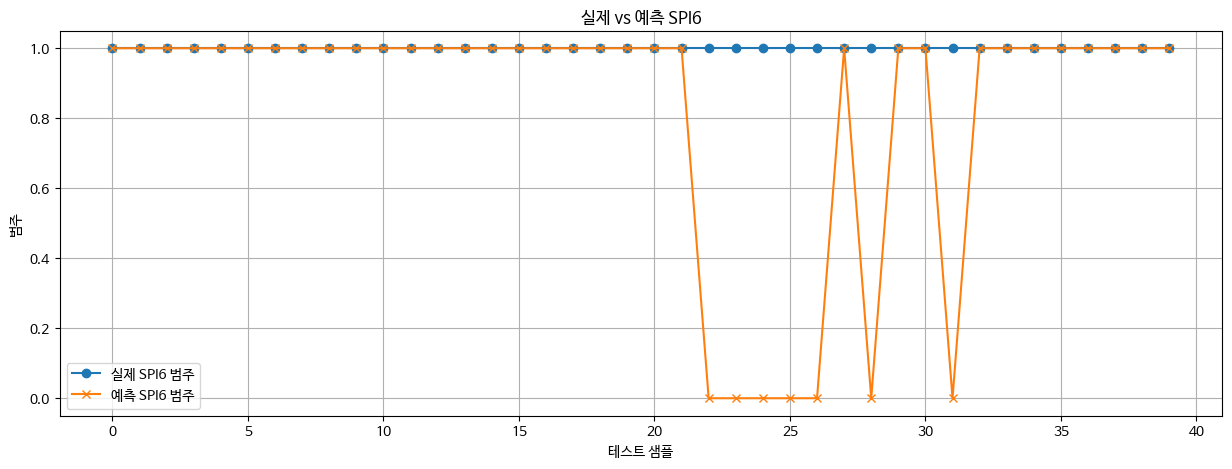

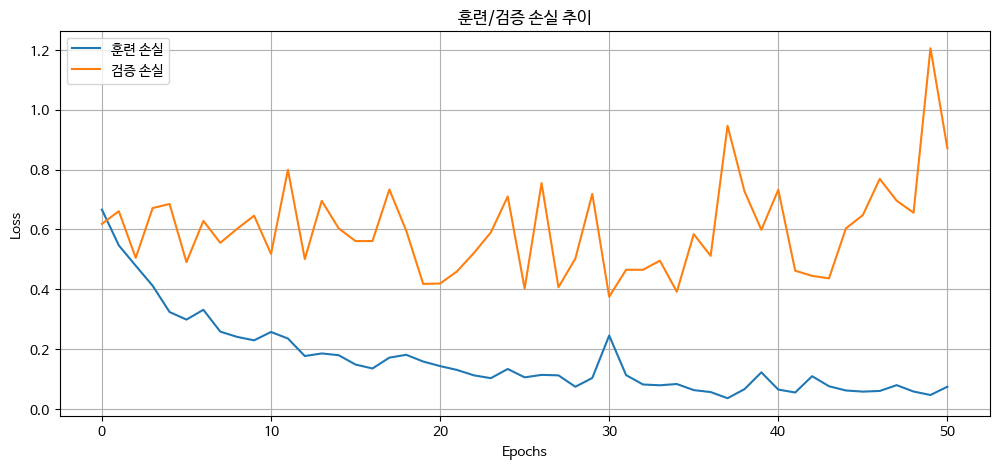

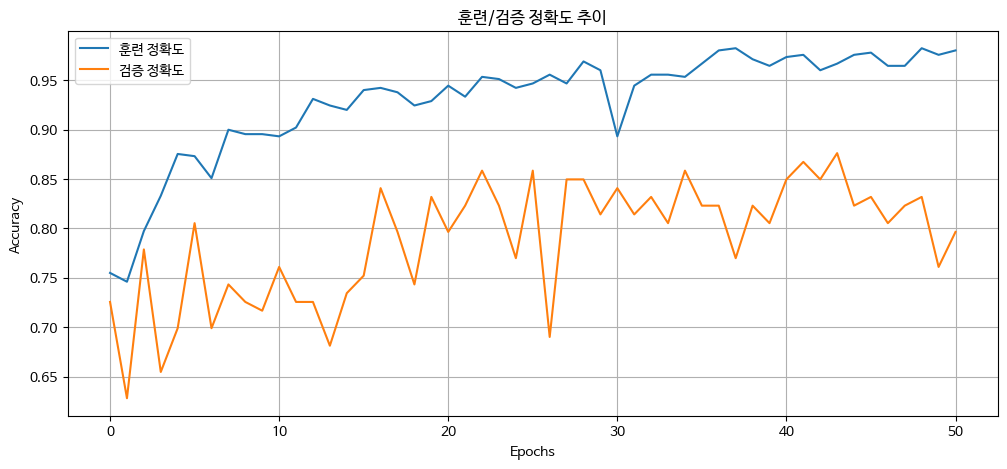

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)
y = df[target]

# -----------------------------
# y 2개 범주로 변환
# -----------------------------
def categorize_y_binary(y):
    return np.array([0 if val < 0 else 1 for val in y])

y_bin = categorize_y_binary(y)

# train/test 분할
test_size = 52
X_train, X_test = X[:-test_size], X[-test_size:]
y_train_bin, y_test_bin = y_bin[:-test_size], y_bin[-test_size:]

# -----------------------------
# 스케일링
# -----------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------
# 라벨 인코딩
# -----------------------------
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_bin)
y_test_enc  = le.transform(y_test_bin)

# -----------------------------
# 시퀀스 데이터셋 생성
# -----------------------------
def create_sequences(X, y, time_steps=12):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 12
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_enc, time_steps)
X_test_seq, y_test_seq   = create_sequences(X_test_scaled, y_test_enc, time_steps)

# -----------------------------
# 클래스 가중치 계산
# -----------------------------
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)
class_weights_dict = dict(enumerate(class_weights))

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(200, input_shape=(time_steps, X_train_seq.shape[2])),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.00035)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# -----------------------------
# 학습
# -----------------------------
es = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train_seq, y_train_seq,
    validation_split=0.2,
    epochs=200,
    batch_size=8,
    class_weight=class_weights_dict,
    callbacks=[es],
    verbose=1
)

# -----------------------------
# 예측
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

# -----------------------------
# 평가
# -----------------------------
acc  = accuracy_score(y_test_seq, y_pred_class)
prec = precision_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
rec  = recall_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)
f1   = f1_score(y_test_seq, y_pred_class, average='weighted', zero_division=0)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6 범주', marker='o')
plt.plot(y_pred_class, label='예측 SPI6 범주', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('범주')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# 2025년 예측

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.6947 - loss: 0.7586 - val_accuracy: 0.7845 - val_loss: 0.6458
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6837 - loss: 0.7051 - val_accuracy: 0.5862 - val_loss: 0.6441
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6330 - loss: 0.6611 - val_accuracy: 0.6034 - val_loss: 0.6099
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6736 - loss: 0.6073 - val_accuracy: 0.6379 - val_loss: 0.6089
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7900 - loss: 0.5396 - val_accuracy: 0.6638 - val_loss: 0.6216
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8158 - loss: 0.4744 - val_accuracy: 0.6810 - val_loss: 0.6002
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8259 - loss: 0.4398 - val_accuracy: 0.6379 - val_loss: 0.6989
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8576 - loss: 0.4014 - val_accuracy: 0.

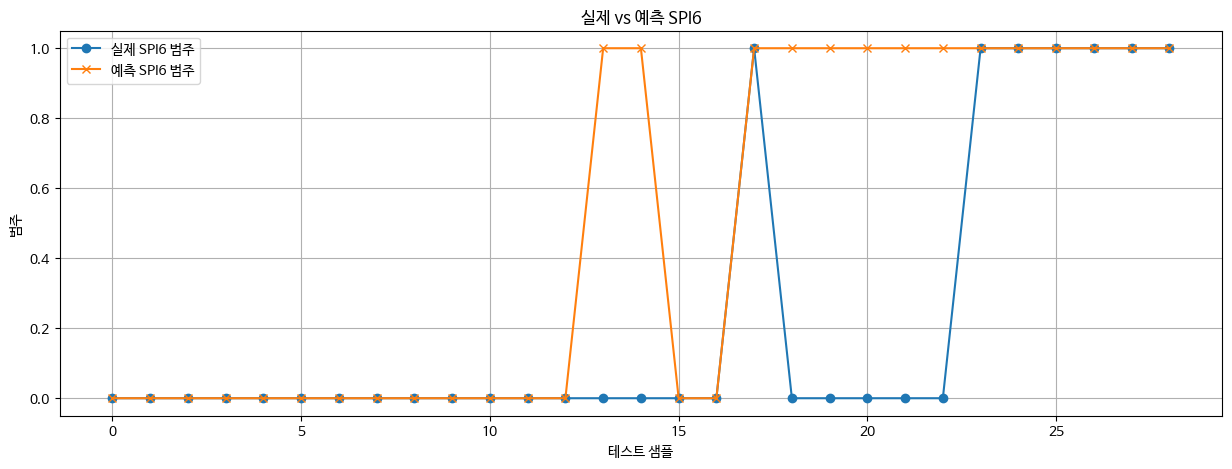

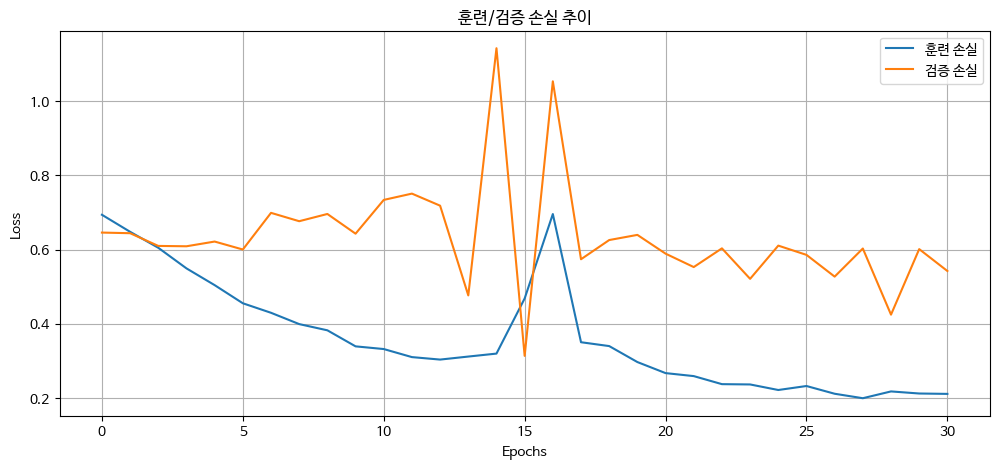

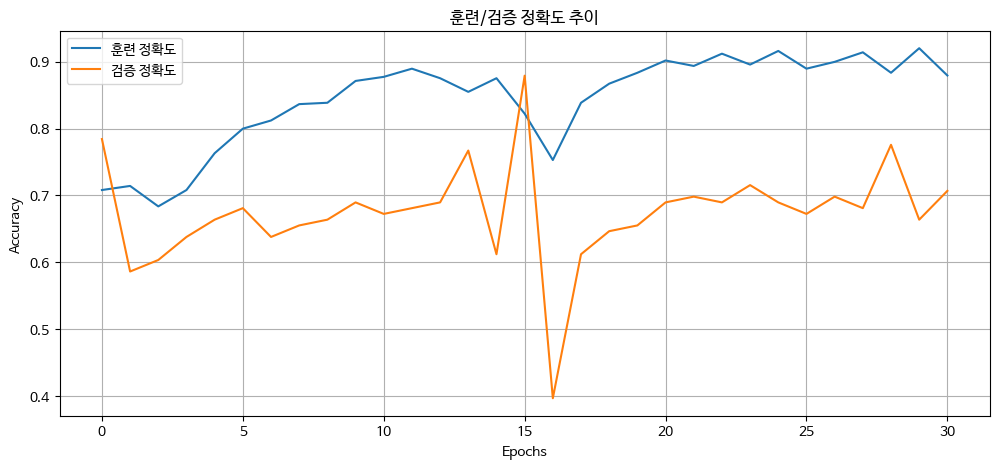

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# -----------------------------
# 데이터 준비
# -----------------------------
df = pd.read_csv('/content/광동댐_최종_VIF_2025.csv', encoding='cp949')
df = df.set_index('관측일시')

target = '가뭄(SPI6)'
X = df.drop([target], axis=1)
y = df[target]

# y 2개 범주로 변환 (음수:1, 0 이상:0)
y_bin = np.array([1 if val < 0 else 0 for val in y])

# train/test 분할
test_size = 39
X_train, X_test = X[:-test_size], X[-test_size:]
y_train_bin, y_test_bin = y_bin[:-test_size], y_bin[-test_size:]

# -----------------------------
# 스케일링 (훈련데이터로만 fit)
# -----------------------------
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# -----------------------------
# 검증 세트 분리 (시계열 순서 유지)
# -----------------------------
val_ratio = 0.2
split = int(len(X_train_scaled) * (1 - val_ratio))

X_tr, X_val = X_train_scaled[:split], X_train_scaled[split:]
y_tr, y_val = y_train_bin[:split], y_train_bin[split:]

# -----------------------------
# 시퀀스 생성 함수
# -----------------------------
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_tr_seq,  y_tr_seq  = create_sequences(X_tr,  y_tr,  time_steps)
X_val_seq, y_val_seq = create_sequences(X_val, y_val, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_bin, time_steps)

# -----------------------------
# 클래스 가중치 (불균형 대응)
# -----------------------------
classes = np.array([0,1])
cw = compute_class_weight('balanced', classes=classes, y=y_tr_seq)
class_weight = {0: cw[0], 1: cw[1]}

# -----------------------------
# LSTM 모델 정의
# -----------------------------
model = Sequential([
    LSTM(160, input_shape=(time_steps, X_tr_seq.shape[2])),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# -----------------------------
# 학습
# -----------------------------
history = model.fit(
    X_tr_seq, y_tr_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=200,
    batch_size=32,
    shuffle=False,       # 시계열 데이터이므로 셔플 금지
    callbacks=[es],
    class_weight=class_weight,
    verbose=1
)

# -----------------------------
# 예측 및 평가
# -----------------------------
y_pred_prob = model.predict(X_test_seq)
y_pred_class = y_pred_prob.argmax(axis=1)

print("\n=== 상세 분류 리포트 ===")
print(classification_report(
    y_test_seq,
    y_pred_class,
    target_names=["비가뭄(0)", "가뭄(1)"]
))

# -----------------------------
# 시각화: 실제 vs 예측
# -----------------------------
plt.figure(figsize=(15,5))
plt.plot(y_test_seq, label='실제 SPI6 범주', marker='o')
plt.plot(y_pred_class, label='예측 SPI6 범주', marker='x')
plt.title('실제 vs 예측 SPI6')
plt.xlabel('테스트 샘플')
plt.ylabel('범주')
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 학습 손실 & 정확도 그래프
# -----------------------------
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='훈련 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('훈련/검증 손실 추이')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='훈련 정확도')
plt.plot(history.history['val_accuracy'], label='검증 정확도')
plt.title('훈련/검증 정확도 추이')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
